# PA005: High Value Customer Identification 

# 0.0. Planejamento da Solução (IOT) 

### Input - Entrada  

#### 1. Problema do negócio:
       -Selecionar os clientes mais valiosos para integrar um programa de fidelidade
#### 2. Conjunto de dados:
       -Vendas de um e-commerce online durante um ano

### Output - Saída 

1. A indicação das pessoas que farão parte do programa Insiders
    -Lista: client_id | is_insiders
        10323 | yes/1
        10654 | no/2
2. Relatório com as repostas das perguntas de negócio
        1 - Quem são as pessoas elegíveis para participar do programa de Insiders ?
        2 - Quantos clientes farão parte do grupo?
        3 - Quais as principais características desses clientes ?
        4 - Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
        5 - Qual a expectativa de faturamento desse grupo para os próximos meses ?
        6 - Quais as condições para uma pessoa ser elegível ao Insiders ?
        7 - Quais as condições para uma pessoa ser removida do Insiders ?
        8 - Qual a garantia que o programa Insiders é melhor que o restante da base ?
        9 - Quais ações o time de marketing pode realizar para aumentar o faturamento?

### Task - Tarefas 

1. Quem são as pessoas elegíveis para participar do programa de Insiders?
   - O que é ser elegível? O que são clientes de maior "valor"? 
   - Faturamento:
       - Alto ticket médio
       - Alto LTV
       - Baixo Recência
       - Alto Basket Size
       - Baixa Probabilidade de Churn
       - Alta Previsão LTV
       - Alta Propensão de Compras 
       
                
    - Custo:
       - Baixa taxa de devolução   
       
    - Experiência de compra:
       - Média alta das avaliações 
       
              
2. Quantos clientes farão parte do grupo?
     - Número total de tickets
     - % do grupo Insiders
          
3. Quais as principais características desses clientes? 
     - Escrever características do cliente:
       - Idade
       - Localização
     - Escrever características do consumo:
       - Atributos de Clusterização
    
4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders?
     - Faturamento total do ano
     - Faturamento do grupo Insiders
     
5. Qual a expectativa de faturamento desse grupo para os próximos meses?
      - LTV do grupo Insiders
      - Análise de Cohort

6. Quais as condições para uma pessoa ser elegível ao Insiders?
      - Definir a periodicidade (1 mês, 3 meses)
      - A pessoa ser similar ou parecido com uma pessoa do grupo
      
7. Quais as condições para uma pessoa ser removida do Insiders?
      - Definir a periodicidade (1 mês, 3 meses)
      - A pessoa ser dissimilar ou não-parecido com uma pessoa do grupo
      
8. Qual a garantia que o programa Insiders é melhor que o restante da base?
      - Teste A/B
      - Teste A/B Bayesiano
      - Teste de Hipóteses
      

9. Quais ações o time de marketing pode realizar para aumentar o faturamento?
      - Desconto
      - Preferência de compra
      - Frete
      - Visita a empresa
     

# <font color=red> 0.0. Imports <font/>

In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sns

import umap.umap_ as umap

from IPython.display import HTML
from matplotlib import pyplot as plt

from pandas_profiling import ProfileReport

from sklearn import cluster       as c
from sklearn import metrics       as m
from sklearn import ensemble      as en
from sklearn import preprocessing as pp
from sklearn import decomposition as dd
from sklearn import manifold      as mn
from sklearn import mixture       as mx
from scipy.cluster import hierarchy as hc
from sklearn.neighbors import NearestNeighbors

from plotly import express as px

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## 0.1. Helper Functions 

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [24,9]
    plt.rcParams['font.size'] = 24
                     
    display(HTML('<style>.container {widht:100% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
                     
    sns.set()
jupyter_settings()
                                      
                                     
                     
                     
                     
                     

Populating the interactive namespace from numpy and matplotlib


## 0.2. Load Dataset 

In [3]:
df_raw = pd.read_csv('C:/Users/Michelle/repos/pa005_insiders_clustering/pa005_insiders_clustering/insiders_clustering/data/raw/Ecommerce.csv')

#drop columns NaN
df_raw = df_raw.drop(columns=['Unnamed: 8'], axis=1)
df_raw.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# <font color=red> 1.0. Descrição dos Dados <font/>

## 1.1. Rename Columns

In [4]:
df1 = df_raw.copy()

In [5]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
cols_new = ['invoice_no','stock_code','description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']
df1.columns=cols_new
df1.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

In [7]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## 1.2. Data Dimensions

In [8]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of cols: {}'.format(df1.shape[1]))

Number of rows: 541909
Number of cols: 8


## 1.3. Data Types

In [9]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4. Check NA

In [10]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5. Replace NA

In [11]:
df_missing=df1.loc[df1['customer_id'].isna(),:]
df_not_missing=df1.loc[~df1['customer_id'].isna(),:]

In [12]:
# create reference
df_backup = pd.DataFrame( df_missing['invoice_no'].drop_duplicates() )
df_backup['customer_id'] = np.arange( 19000, 19000+len( df_backup ), 1)

# merge original with reference dataframe
df1 = pd.merge( df1, df_backup, on='invoice_no', how='left' )

# coalesce 
df1['customer_id'] = df1['customer_id_x'].combine_first( df1['customer_id_y'] )

# drop extra columns
df1 = df1.drop( columns=['customer_id_x', 'customer_id_y'], axis=1 )

In [13]:
df1.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

## 1.6. Change dtypes

In [14]:
#invoice date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

#customer id
df1['customer_id'] = df1['customer_id'].astype(int64)
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


In [15]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

## 1.7. Descriptive Statistics

In [16]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### 1.7.1. Descriptive Statistics

In [17]:
# central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
             
# dispersion - desvio padrão, minimo, maximo, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'mediana', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,mediana,std,skew,kurtosis
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,218.080957,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759764,186.506972,59005.719097
2,customer_id,12346.00,22709.0,10363.00,16688.840453,16249.00,2911.408666,0.487449,-0.804287


#### 1.7.1.1. Numerical Attributs - Investigating

1 - Quantidade negativa (pode ser devolução)

2 - Preço unitário igual a zero (pode ser promoção?)

### 1.7.2. Categorical Attributs

### Invoice No

In [18]:
# problema: Temos invoice com letras e numeros
#df1['invoice_no'].astype( int )

# identficacao: 
df_letter_invoices = df1.loc[df1['invoice_no'].apply( lambda x: bool( re.search( '[^0-9]+', x ) ) ), :]
df_letter_invoices.head()

print( 'Total number of invoices: {}'.format( len( df_letter_invoices ) ) )
print( 'Total number of negative quantity: {}'.format( len( df_letter_invoices[ df_letter_invoices['quantity'] < 0 ] ) ) )

Total number of invoices: 9291
Total number of negative quantity: 9288


### Stock Code

In [19]:
#stock_code
df1.loc[df1['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'].unique()

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

In [20]:
len(df1.loc[df1['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) )])

2759

### Description

In [21]:
df1.head()

# Acão: Delete description

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


### Country

In [22]:
df1['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [23]:
df1['country'].value_counts( normalize=True ).head()

United Kingdom    0.914320
Germany           0.017521
France            0.015790
EIRE              0.015124
Spain             0.004674
Name: country, dtype: float64

In [24]:
df1[['customer_id', 'country']].drop_duplicates().groupby( 'country' ).count().reset_index().sort_values( 'customer_id', ascending=False).head()

,country,customer_id
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31


# <font color=red> 2.0. Variable Filtering <font/>

In [25]:
df2 = df1.copy()

In [26]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

In [27]:
# Numerical attributes 
df2 = df2.loc[df2['unit_price'] >= 0.04, :]

# Categorical attributes 
df2 = df2[~df2['stock_code'].isin(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK'])]

# description
df2 = df2.drop( columns='description', axis=1 )

# map 
df2 = df2[~df2['country'].isin( ['European Community', 'Unspecified' ] ) ]

# quantity
df2_returns = df2.loc[df1['quantity'] < 0, :]
df2_purchases = df2.loc[df1['quantity'] >= 0, :]


In [28]:
#bad_users
df2=df2[~df2['customer_id'].isin( [16446] ) ]
          

# <font color=red> 3.0. Feature Engineering <font/>

In [29]:
df3 = df2.copy()


In [30]:
df3.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850


## 3.1. Feature Creation

In [31]:
# data reference
df_ref = df3.drop( ['invoice_no', 'stock_code', 'quantity', 'invoice_date', 'unit_price', 'country'], axis=1 ).drop_duplicates( ignore_index=True )

### 3.1.1. Gross Revenue

In [32]:
# Gross Revenue ( Faturamento ) quantity * price
df2_purchases.loc[:, 'gross_revenue'] = df2_purchases.loc[:, 'quantity'] * df2_purchases.loc[:, 'unit_price']

# Monetary
df_monetary = df2_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
dtype: int64

### 3.1.2. Recency - Day from last purchase

In [33]:
# Recency - Last day purchase
df_recency = df2_purchases.loc[:, ['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
df_recency['recency_days'] = ( df2['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

In [34]:
print(df2['invoice_date'].max())

2017-12-07 00:00:00


In [35]:
df2.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850


In [36]:
df_ref.head()

,customer_id,gross_revenue,recency_days
0,17850,5391.21,372.0
1,13047,3232.59,56.0
2,12583,6705.38,2.0
3,13748,948.25,95.0
4,15100,876.00,333.0


### 3.1.3. Quantity purchased

In [37]:
# Numero de produtos
df_freq = (df2_purchases.loc[:, ['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id' ).count()
                                                             .reset_index()
                                                             .rename( columns={'invoice_no': 'qtde_invoices'}) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
dtype: int64

### 3.1.4. Quantity total of items purchased

In [38]:
# Numero de produtos
df_freq = (df2_purchases.loc[:, ['customer_id', 'quantity']].groupby( 'customer_id' ).sum().reset_index().rename( columns={'quantity': 'qtde_items'} ) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
dtype: int64

### 3.1.5. Quantity of products purchased

In [39]:
# Numero de produtos
df_freq = (df2_purchases.loc[:, ['customer_id', 'stock_code']].groupby( 'customer_id' ).count()
                                                           .reset_index()
                                                           .rename( columns={'stock_code': 'qtde_products'} ) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
qtde_products    91
dtype: int64

### 3.1.6. Average Ticket Value 

In [40]:
# Avg Ticket
df_avg_ticket = df2_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns={'gross_revenue':'avg_ticket'} )
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
qtde_products    91
avg_ticket       91
dtype: int64

### 3.1.7. Average Recency days

In [41]:
# Average recency days
df_aux = df2[['customer_id', 'invoice_date']].drop_duplicates().sort_values( ['customer_id', 'invoice_date'], ascending=['False', 'False'] )
df_aux['next_customer_id'] = df_aux['customer_id'].shift() 
df_aux['previous_date'] = df_aux['invoice_date'].shift() 

df_aux['avg_recency_days'] = df_aux.apply( lambda x: ( x['invoice_date'] - x['previous_date'] ).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1 )

df_aux = df_aux.drop( ['invoice_date', 'next_customer_id', 'previous_date'], axis=1 ).dropna()

# average recency 
df_avg_recency_days = df_aux.groupby( 'customer_id' ).mean().reset_index()

# merge
df_ref = pd.merge( df_ref, df_avg_recency_days, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
dtype: int64

### 3.1.8. Frequency Purchase

In [42]:
df_aux = ( df2_purchases[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
                                                             .groupby( 'customer_id')
                                                             .agg( max_ = ( 'invoice_date', 'max' ), 
                                                                   min_ = ( 'invoice_date', 'min' ),
                                                                   days_= ( 'invoice_date', lambda x: ( ( x.max() - x.min() ).days ) + 1 ),
                                                                   buy_ = ( 'invoice_no', 'count' ) ) ).reset_index()
# Frequency
df_aux['frequency'] = df_aux[['buy_', 'days_']].apply( lambda x: x['buy_'] / x['days_'] if  x['days_'] != 0 else 0, axis=1 )

# Merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left' )

df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
dtype: int64

### 3.1.9. Number of Returns

In [43]:
df_returns = df2_returns[['customer_id', 'quantity']].groupby( 'customer_id' ).sum().reset_index().rename( columns={'quantity':'qtde_returns'} )
df_returns['qtde_returns'] = df_returns['qtde_returns'] * -1

df_ref = pd.merge( df_ref, df_returns, how='left', on='customer_id' )
df_ref.loc[df_ref['qtde_returns'].isna(), 'qtde_returns'] = 0

df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
qtde_returns           0
dtype: int64

### 3.2.0. Basket Size - Quantity of items for basket

In [44]:
df_aux = ( df2_purchases.loc[:, ['customer_id', 'invoice_no', 'quantity']].groupby( 'customer_id' )
                                                                            .agg( n_purchase=( 'invoice_no', 'nunique'),
                                                                                  n_products=( 'quantity', 'sum' ) )
                                                                            .reset_index() )

# calculation
df_aux['avg_basket_size']= df_aux['n_products']/df_aux['n_purchase']

# merge
df_ref = pd.merge( df_ref, df_aux[['customer_id','avg_basket_size']], how='left', on='customer_id' )
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
qtde_returns           0
avg_basket_size       91
dtype: int64

### 3.2.1. Unique Basket Size - Quantidade de produtos distintos por compra


In [45]:
df_aux = ( df2_purchases.loc[:, ['customer_id', 'invoice_no', 'stock_code']].groupby( 'customer_id' )
                                                                            .agg( n_purchase=( 'invoice_no', 'nunique'),
                                                                                   n_products=( 'stock_code', 'count' ) )
                                                                            .reset_index())

# calculation
df_aux['avg_unique_basket_size']=df_aux['n_products']/df_aux['n_purchase']

# merge
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how='left', on='customer_id')
df_ref.isna().sum()

customer_id                  0
gross_revenue               91
recency_days                91
qtde_invoices               91
qtde_items                  91
qtde_products               91
avg_ticket                  91
avg_recency_days          2816
frequency                   91
qtde_returns                 0
avg_basket_size             91
avg_unique_basket_size      91
dtype: int64

# <font color=red> 4.0. Exploratory Data Analysis <font/>

In [46]:
df4=df_ref.dropna()
df4.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qtde_invoices             0
qtde_items                0
qtde_products             0
avg_ticket                0
avg_recency_days          0
frequency                 0
qtde_returns              0
avg_basket_size           0
avg_unique_basket_size    0
dtype: int64

## 4.1. Univariate Analysis 

In [47]:
#profile = ProfileReport( df4 )
#profile.to_file( 'output_v1.html' )

### 4.1.1. Gross Revenue

### 4.1.2. Qtde Items

In [48]:
df4[df4['qtde_items']==196844]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,72.0,196844.0,2060.0,135.503893,7.844444,0.20339,288.0,2733.944444,28.611111


In [49]:
df3[df3['customer_id'] == 14646].sort_values('quantity', ascending=False).head(30)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
421601,573003,23084,2400,2017-10-25,2.08,Netherlands,14646
409248,572052,22595,1728,2017-10-18,0.72,Netherlands,14646
63444,541570,21212,1440,2017-01-17,0.42,Netherlands,14646
534952,581175,23084,1440,2017-12-05,1.79,Netherlands,14646
186820,552883,21212,1200,2017-05-10,0.42,Netherlands,14646
204198,554642,22243,960,2017-05-23,1.45,Netherlands,14646
137027,548011,22630,640,2017-03-27,1.65,Netherlands,14646
137026,548011,22629,640,2017-03-27,1.65,Netherlands,14646
454041,575508,22492,576,2017-11-08,0.55,Netherlands,14646
408892,572035,22492,576,2017-10-18,0.55,Netherlands,14646


### 4.1.3. qtde_products

In [50]:
df4[df4['qtde_products'] == 7838] # Valor máximo de variedade de produtos por customer id

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
68,17841,40967.72,1.0,124.0,23053.0,7838.0,5.226808,3.321429,0.33244,203.0,185.91129,63.209677


### 4.1.4. Avg Ticket

In [51]:
df4[df4['avg_ticket'] == 56157.5] #Maior número de itens comprados por um customer_id

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size


In [52]:
df3[df3['customer_id'] == 16446] # O maior número de avg ticket foi devolvido no mesmo dia - avaliar 

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id


### 4.1.5. Frequency

In [53]:
df4[df4['frequency']==17]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222,35.5,17.0,40.0,50.970588,8.735294


In [54]:
df3[df3['customer_id']==17850].sort_values(['quantity'], ascending = False).head(34)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
4528,536790,84406B,12,2016-11-30,2.75,United Kingdom,17850
4162,536750,71053,12,2016-11-30,3.39,United Kingdom,17850
3808,536685,85123A,12,2016-11-30,2.55,United Kingdom,17850
4526,536790,85123A,12,2016-11-30,2.95,United Kingdom,17850
4527,536790,71053,12,2016-11-30,3.39,United Kingdom,17850
3809,536685,71053,12,2016-11-30,3.39,United Kingdom,17850
4531,536790,37370,12,2016-11-30,1.06,United Kingdom,17850
4532,536790,21071,12,2016-11-30,1.06,United Kingdom,17850
4533,536790,21068,12,2016-11-30,1.06,United Kingdom,17850
290,536396,82494L,12,2016-11-29,2.55,United Kingdom,17850


In [55]:
df4.columns

Index(['customer_id', 'gross_revenue', 'recency_days', 'qtde_invoices',
       'qtde_items', 'qtde_products', 'avg_ticket', 'avg_recency_days',
       'frequency', 'qtde_returns', 'avg_basket_size',
       'avg_unique_basket_size'],
      dtype='object')

## 4.2. Bivariate Analysis 

In [56]:
cols=['customer_id']
df42=df4.drop(cols, axis=1)

In [57]:
plt.figure(figsize=(25, 12))
sns.pairplot(df42)

## 4.3. Estudo do Espaço 

In [58]:
# original dataset
df43 = df4.drop( columns=['customer_id'], axis=1 ).copy()

# selected dataset
cols_selected = ['customer_id', 'gross_revenue', 'recency_days', 'qtde_products', 'frequency', 'qtde_returns']
df43 = df4[ cols_selected ].copy() 

In [59]:
mm = pp.MinMaxScaler()

df43['gross_revenue'] = mm.fit_transform( df43[['gross_revenue']] )
df43['recency_days']           = mm.fit_transform( df43[['recency_days']] )
#df43['qtde_invoices']          = mm.fit_transform( df43[['qtde_invoices']])
#df43['qtde_items']             = mm.fit_transform( df43[['qtde_items']])
df43['qtde_products']          = mm.fit_transform( df43[['qtde_products']])
#df43['avg_ticket']             = mm.fit_transform( df43[['avg_ticket']])
#df43['avg_recency_days']       = mm.fit_transform( df43[['avg_recency_days']])
df43['frequency']              = mm.fit_transform( df43[['frequency']])
df43['qtde_returns']           = mm.fit_transform( df43[['qtde_returns']])
#df43['avg_basket_size']        = mm.fit_transform( df43[['avg_basket_size']])
#df43['avg_unique_basket_size'] = mm.fit_transform( df43[['avg_unique_basket_size']] )


X = df43.copy()

### 4.3.1. PCA 

In [66]:
X.shape

(2968, 6)

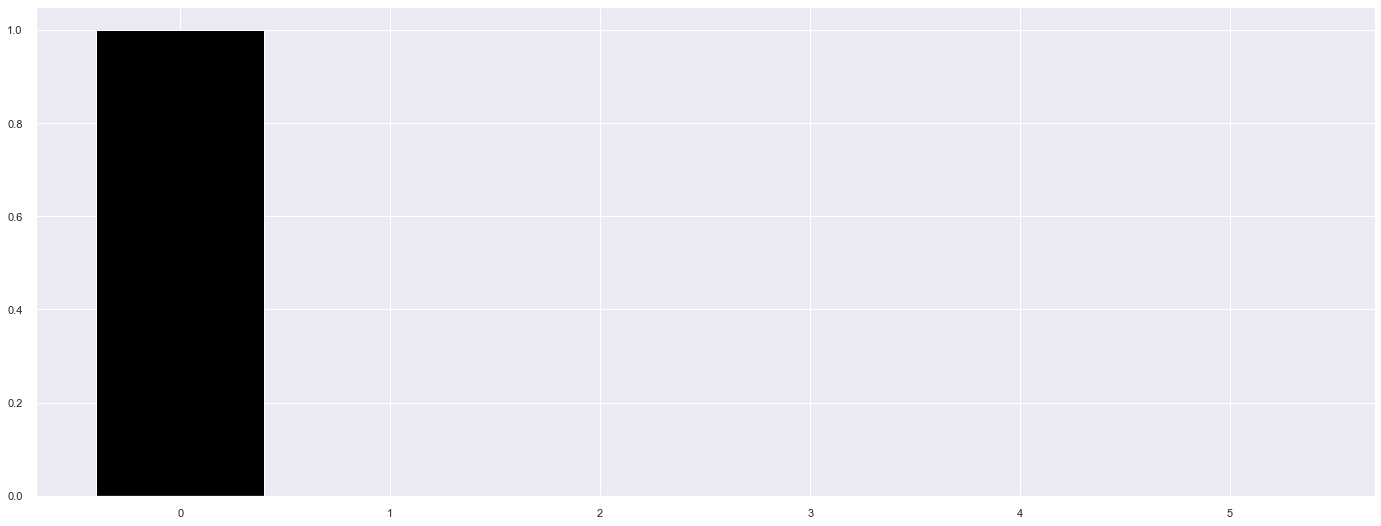

In [67]:
pca = dd.PCA( n_components=X.shape[1] )
principal_components = pca.fit_transform(X)

# plot explained variable
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')

# pca component
df_pca = pd.DataFrame( principal_components )

<AxesSubplot:xlabel='0', ylabel='1'>

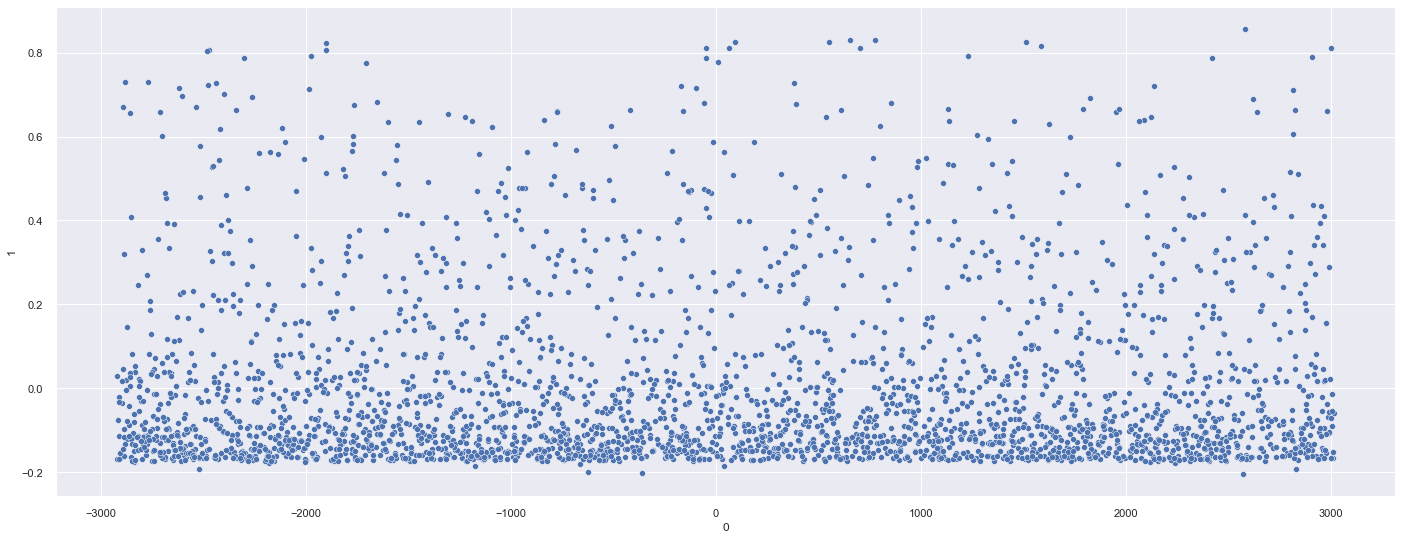

In [68]:
sns.scatterplot( x=0, y=1, data=df_pca )

## 4.3.2. UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

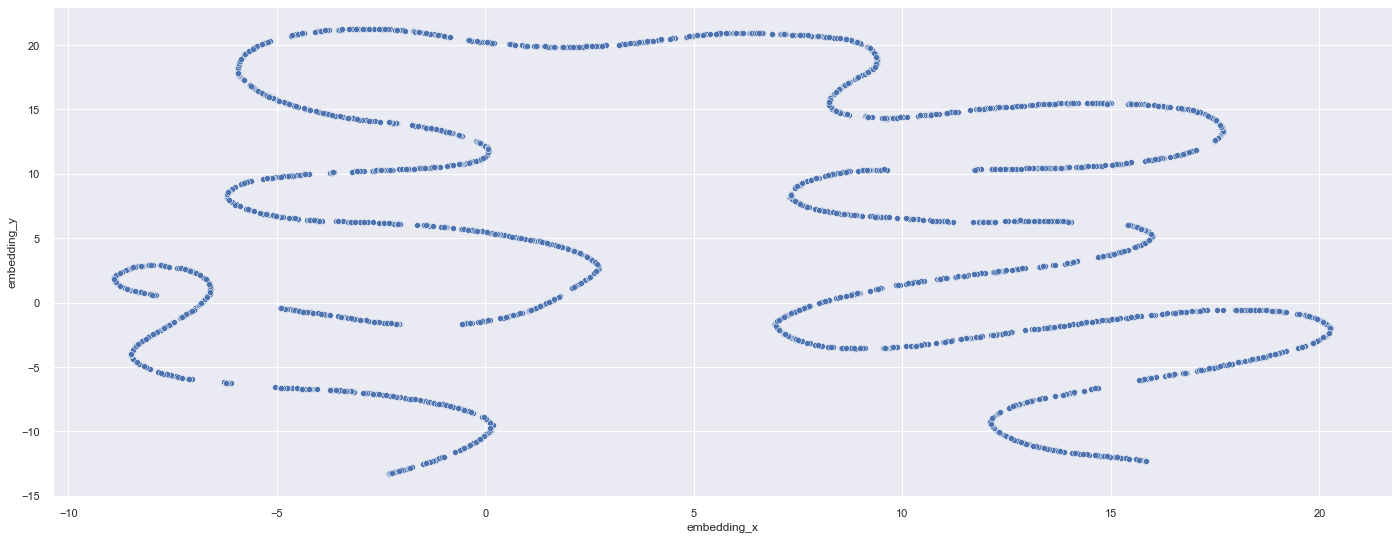

In [69]:
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', 
                 y='embedding_y', 
                 data=df_pca )

### 4.3.2. t-SNE

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

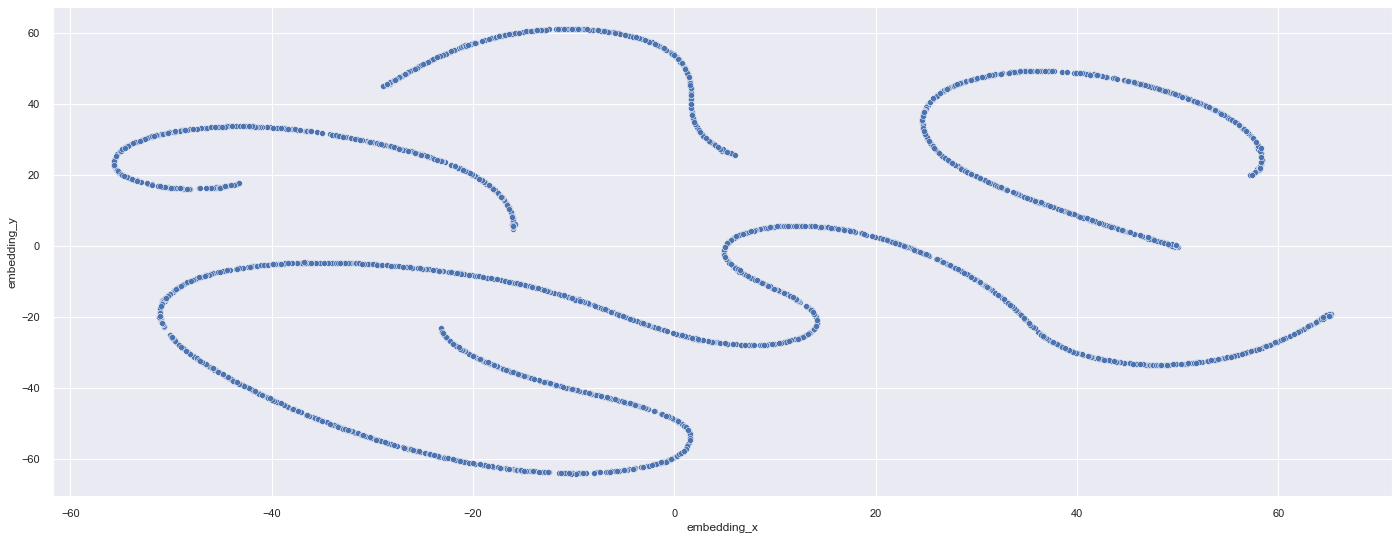

In [70]:
reducer = mn.TSNE( n_components=2, n_jobs=-1, random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', 
                 y='embedding_y', 
                 data=df_pca )

### 4.3.3. Tree-Based Embedding

In [71]:
# training dataset
X = df43.drop( columns=['customer_id', 'gross_revenue'], axis=1 )
y = df43['gross_revenue']

# model definition
rf_model = en.RandomForestRegressor( n_estimators=100, random_state=42 )

# model training
rf_model.fit( X, y )


RandomForestRegressor(random_state=42)

In [72]:
df_leaf = pd.DataFrame(rf_model.apply( X ))

In [73]:
X.shape

(2968, 4)

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

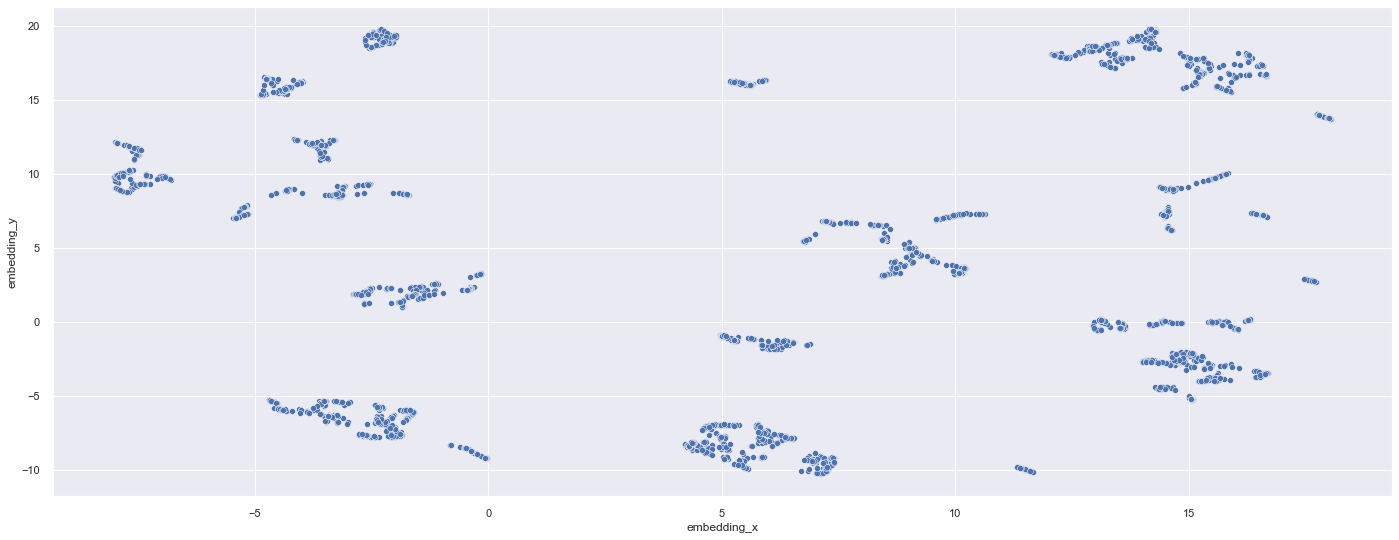

In [74]:
# Reduzer dimensionality
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( df_leaf )

# embedding
df_tree = pd.DataFrame()
df_tree['embedding_x'] = embedding[:, 0]
df_tree['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', 
                 y='embedding_y', 
                 data=df_tree ) 

# <font color=red> 5.0. Data Preparation <font/>

In [75]:
#df5=df4.copy()
df5 = df_tree.copy() 

In [ ]:
#Standard Scaler
#ss = pp . MinMaxScaler ( )

#df5 [ 'gross_revenue' ]  = ss . fit_transform ( df5 [ [ 'gross_revenue' ] ]  ) 
#df5 [ 'recency_days' ]  = ss . fit_transform ( df5 [ [ 'recency_days' ] ]  ) 
#df5 [ 'qtde_invoices' ]  = ss . fit_transform ( df5 [ [ 'qtde_invoices' ] ]  ) 
#df5 ['qtde_items'  ]  = ss .fit_transform ( df5 [ [ 'qtde_items' ] ]  ) 
#df5 [ 'qtde_products' ]  = ss . fit_transform ( df5 [ [ 'qtde_products' ] ]  ) 
#df5 [ 'avg_ticket' ]  = ss . fit_transform ( df5 [ [ 'avg_ticket' ] ]  ) 
#df5 [ 'avg_recency_days' ]  = ss . fit_transform ( df5 [ [ 'avg_recency_days' ] ]  ) 
#df5 [ 'frequency' ]  = ss . fit_transform ( df5 [ [ 'frequency' ] ]  ) 
#df5 [ 'qtde_returns' ]  = ss . fit_transform ( df5 [ [ 'qtde_returns' ] ]  ) 
#df5 [ 'avg_basket_size' ]  = ss . fit_transform  (df5 [ [ 'avg_basket_size' ] ]  ) 
#df5 [ 'avg_unique_basket_size' ]  = ss . fit_transform ( df5 [ [ 'avg_unique_basket_size' ] ]  )

# <font color=red> 6.0. Feature Selection <font/>

In [ ]:
#cols_selected = ['customer_id', 'gross_revenue', 'recency_days', 'qtde_products', 'frequency', 'qtde_returns']

In [ ]:
#df6 = df5[cols_selected].copy()

In [76]:
df6 = df_tree.copy() 

# <font color=red> 7.0. Hiperparameter Fine-Tuning  <font/>

In [77]:
#X = df6.drop( columns=['customer_id'] )
X = df_tree.copy()

In [78]:
clusters=np.arange(2,25,1)

## 7.1. K-Means


In [118]:
from sklearn import metrics as m 

In [119]:
kmeans_list = []
for k in clusters:
    # model definition
    kmeans_model = c.KMeans( n_clusters=k )

    # model training
    kmeans_model.fit( X )

    # model predict
    labels = kmeans_model.predict( X )

    # model performance
    sil = m.silhouette_score( X, labels, metric='euclidean' )
    kmeans_list.append( sil )

Text(0.5, 1.0, 'Silhouette Score x K')

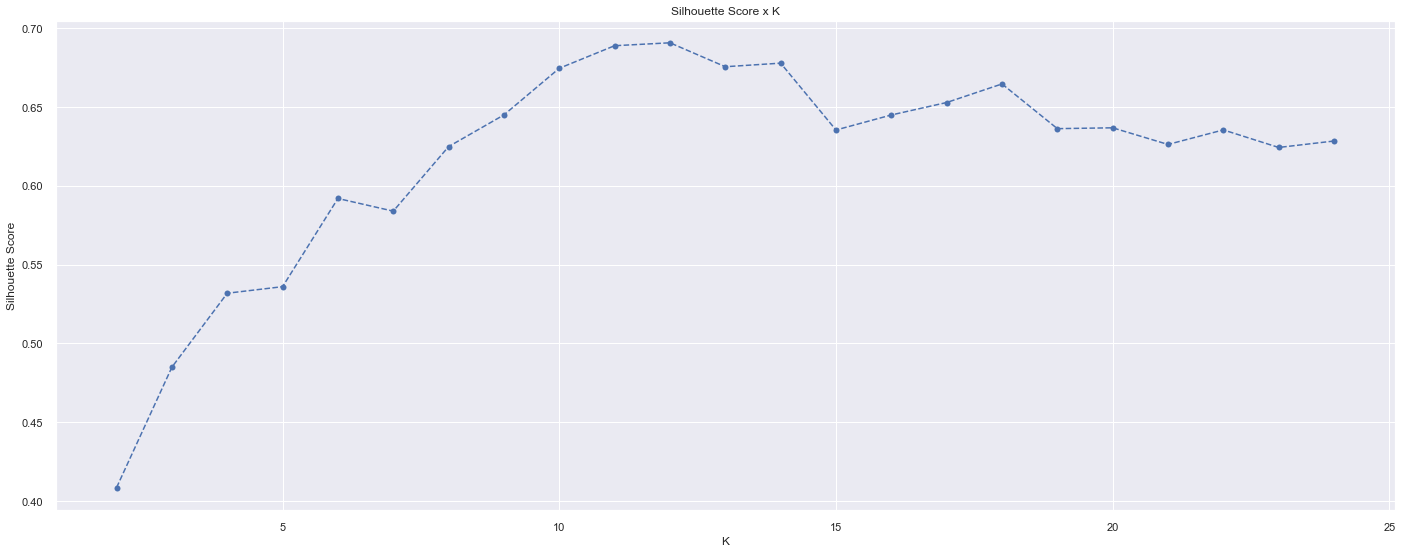

In [120]:
plt.plot( clusters, kmeans_list, linestyle='--', marker='o', color='b' )
plt.xlabel( 'K' );
plt.ylabel( 'Silhouette Score' );
plt.title( 'Silhouette Score x K' )

## 7.2. GMM

In [106]:
gmm_list = []
for k in clusters:
    # model definition
    gmm_model = mx.GaussianMixture( n_components=k )

    # model training
    gmm_model.fit( X )

    # model predict
    labels = gmm_model.predict( X )

    # model performance
    sil = m.silhouette_score( X, labels, metric='euclidean' )
    gmm_list.append( sil )

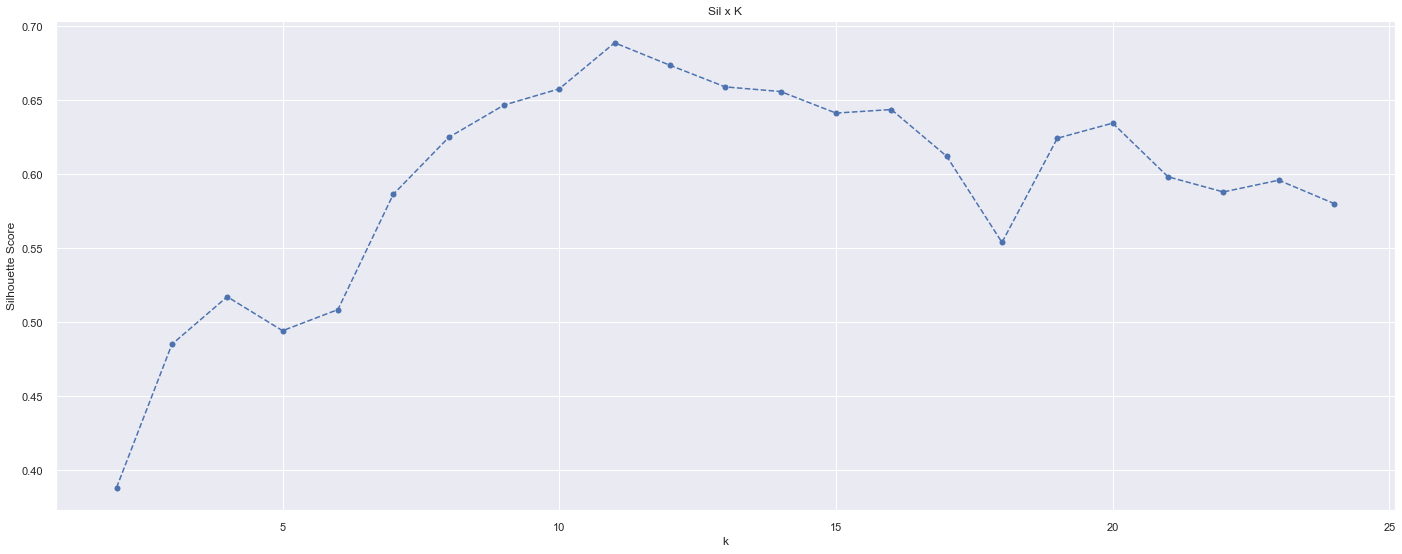

In [83]:
plt.plot( clusters, gmm_list, linestyle='--', marker='o', color='b' )
plt.xlabel( 'k');
plt.ylabel( 'Silhouette Score');
plt.title( 'Sil x K');

## 7.3.Hierarchical Cluster

In [84]:
from scipy.cluster import hierarchy as hc

In [85]:
 # model definition and training
hc_model = hc.linkage( X, 'ward' )

[]

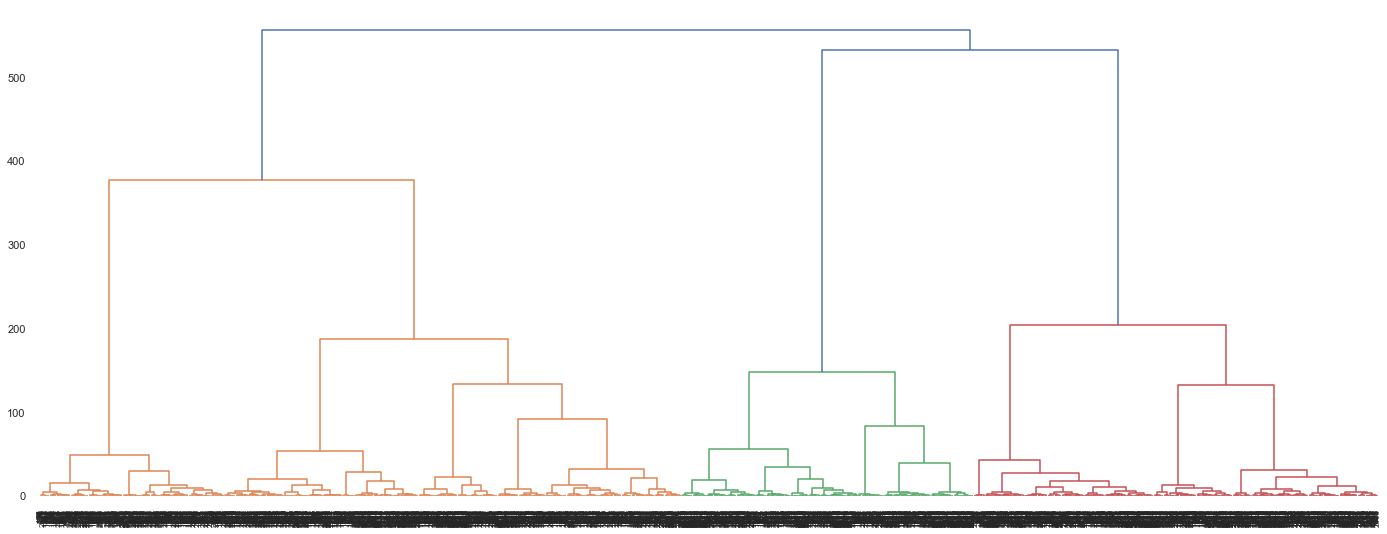

In [86]:
hc.dendrogram( 
    hc_model, 
    leaf_rotation=90, 
    leaf_font_size=8)

plt.plot()

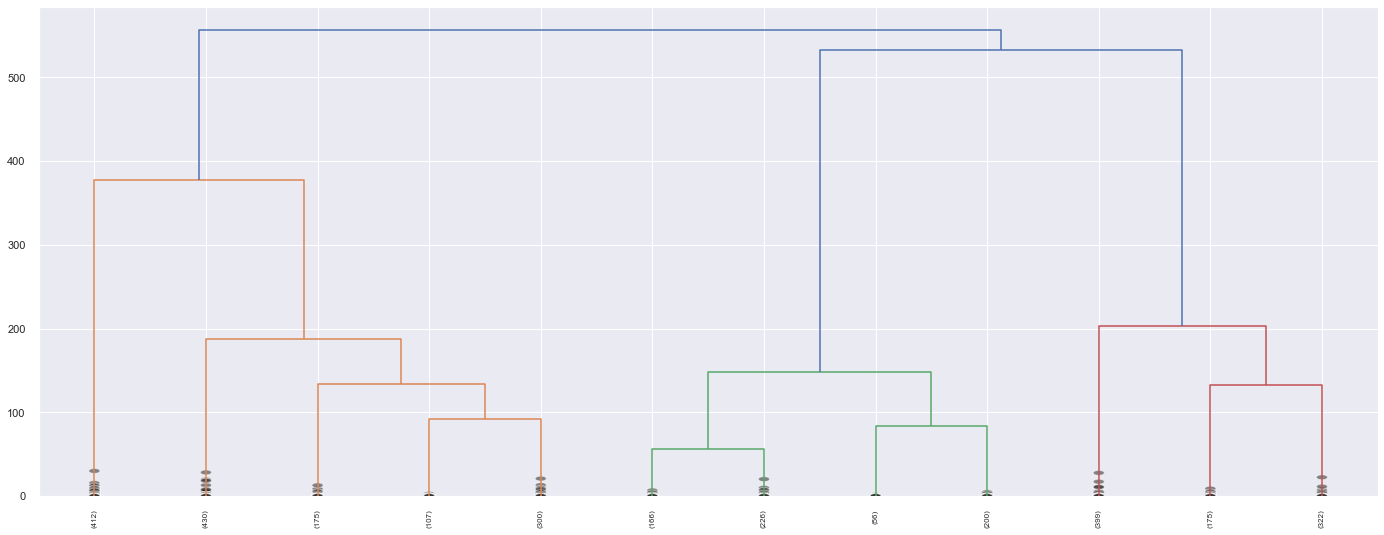

In [87]:
hc.dendrogram(
hc_model, 
truncate_mode = 'lastp', 
p = 12, 
leaf_rotation = 90, 
leaf_font_size = 8, 
show_contracted = True ) 

plt.show ()

### 7.3.1. HClustering Silhouette Score

In [88]:
hc_list = []
for k in clusters:
    # model definition & training
    hc_model = hc.linkage( X, 'ward' )

    # model predict
    labels = hc.fcluster( hc_model, k, criterion='maxclust' )

    # metrics
    sil = m.silhouette_score( X, labels, metric='euclidean' )
    hc_list.append( sil )

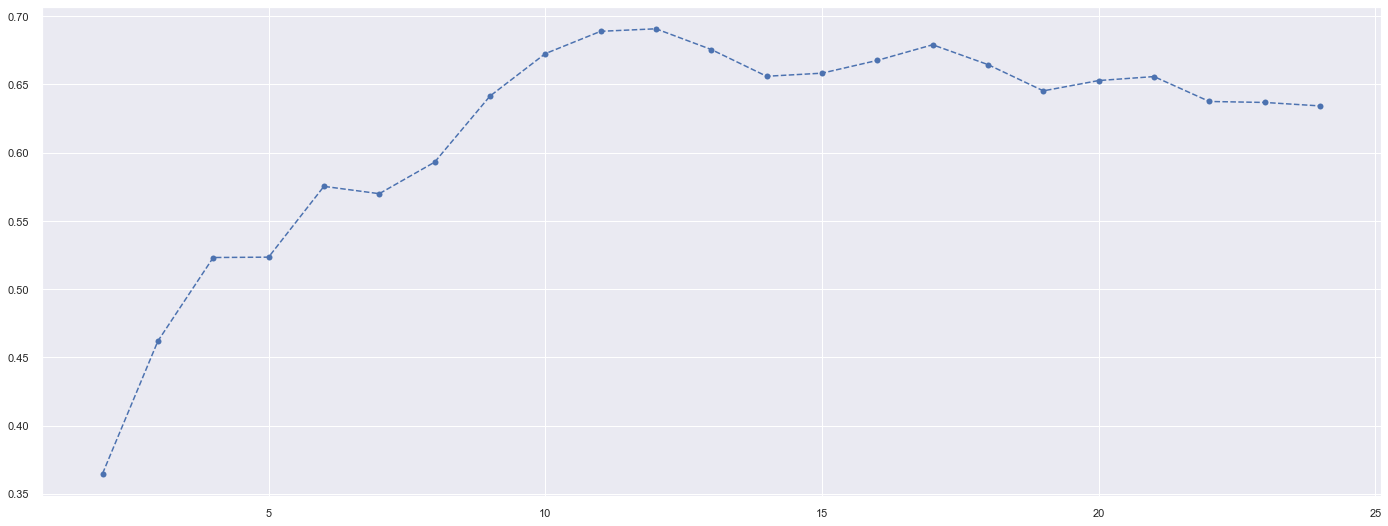

In [89]:
plt.plot( clusters,  hc_list, linestyle='--', marker='o', color='b' )

## 7.4. DBSCAN

In [90]:
eps=2.00
min_samples=20 

# model definition
dbscan_model = c.DBSCAN( eps=eps, min_samples=min_samples )

# mode training & predict 
labels = dbscan_model.fit_predict( X )

sil = m.silhouette_score( X, labels, metric='euclidean' )
print( 'Silhouette Score: {}'.format( sil ) )
print( 'Number of Clusters: {}'.format( len( unique( labels ) ) ) )
print( unique(labels) )

Silhouette Score: 0.6676619052886963
Number of Clusters: 16
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [ ]:
#neighbors = NearestNeighbors( n_neighbors=min_samples ).fit( X )
#distances, indices = neighbors.kneighbors( X )

In [ ]:
#distances = np.sort( distances, axis=0 )
#distances = distances[:,1]
#plt.plot( distances )

In [ ]:
#plt.plot( distances[2000:] )

In [ ]:
#dbscan_list = [ 0.622034, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000]

## 7.5. Results

In [91]:
# Model Name | k=2 | k=3 | k=4 | k=5 | ...
#  Kmeans      SS    SS    SS    SS
#  GMM         SS    SS    SS    SS
#  HC         SS     SS    SS    SS
#  DBSCAN     SS    SS    SS    SS

df_results = pd.DataFrame( 
    {'KMeans': kmeans_list, 
     'GMM': gmm_list, 
     'HC': hc_list}
     #'DBSCAN': dbscan_list}
).T

df_results.columns = clusters

In [92]:
df_results.style.highlight_max( color='lightgreen', axis=1 )

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
KMeans,0.408478,0.484764,0.531839,0.536007,0.591988,0.586444,0.624925,0.645039,0.674637,0.689889,0.691736,0.675621,0.672924,0.657249,0.666738,0.615278,0.664436,0.673053,0.675966,0.628200,0.617658,0.600009,0.614003
GMM,0.388132,0.485055,0.517212,0.494220,0.508514,0.586444,0.624925,0.646831,0.657832,0.688965,0.673775,0.659129,0.656015,0.641420,0.643823,0.612237,0.553938,0.624411,0.634626,0.598339,0.588075,0.596026,0.580263
HC,0.364807,0.461945,0.523169,0.523430,0.575324,0.569951,0.593050,0.641460,0.672593,0.688965,0.690811,0.675621,0.656015,0.658283,0.667657,0.679108,0.664564,0.645330,0.652879,0.655791,0.637538,0.636823,0.634290


## 7.1. Silhouette Analysis

 For K = 2. Silhouette Score: 0.36480677127838135
 For K = 3. Silhouette Score: 0.46194514632225037
 For K = 4. Silhouette Score: 0.5231694579124451
 For K = 5. Silhouette Score: 0.5234296321868896
 For K = 6. Silhouette Score: 0.5753236413002014
 For K = 7. Silhouette Score: 0.5699511766433716


IndexError: index 3 is out of bounds for axis 0 with size 3

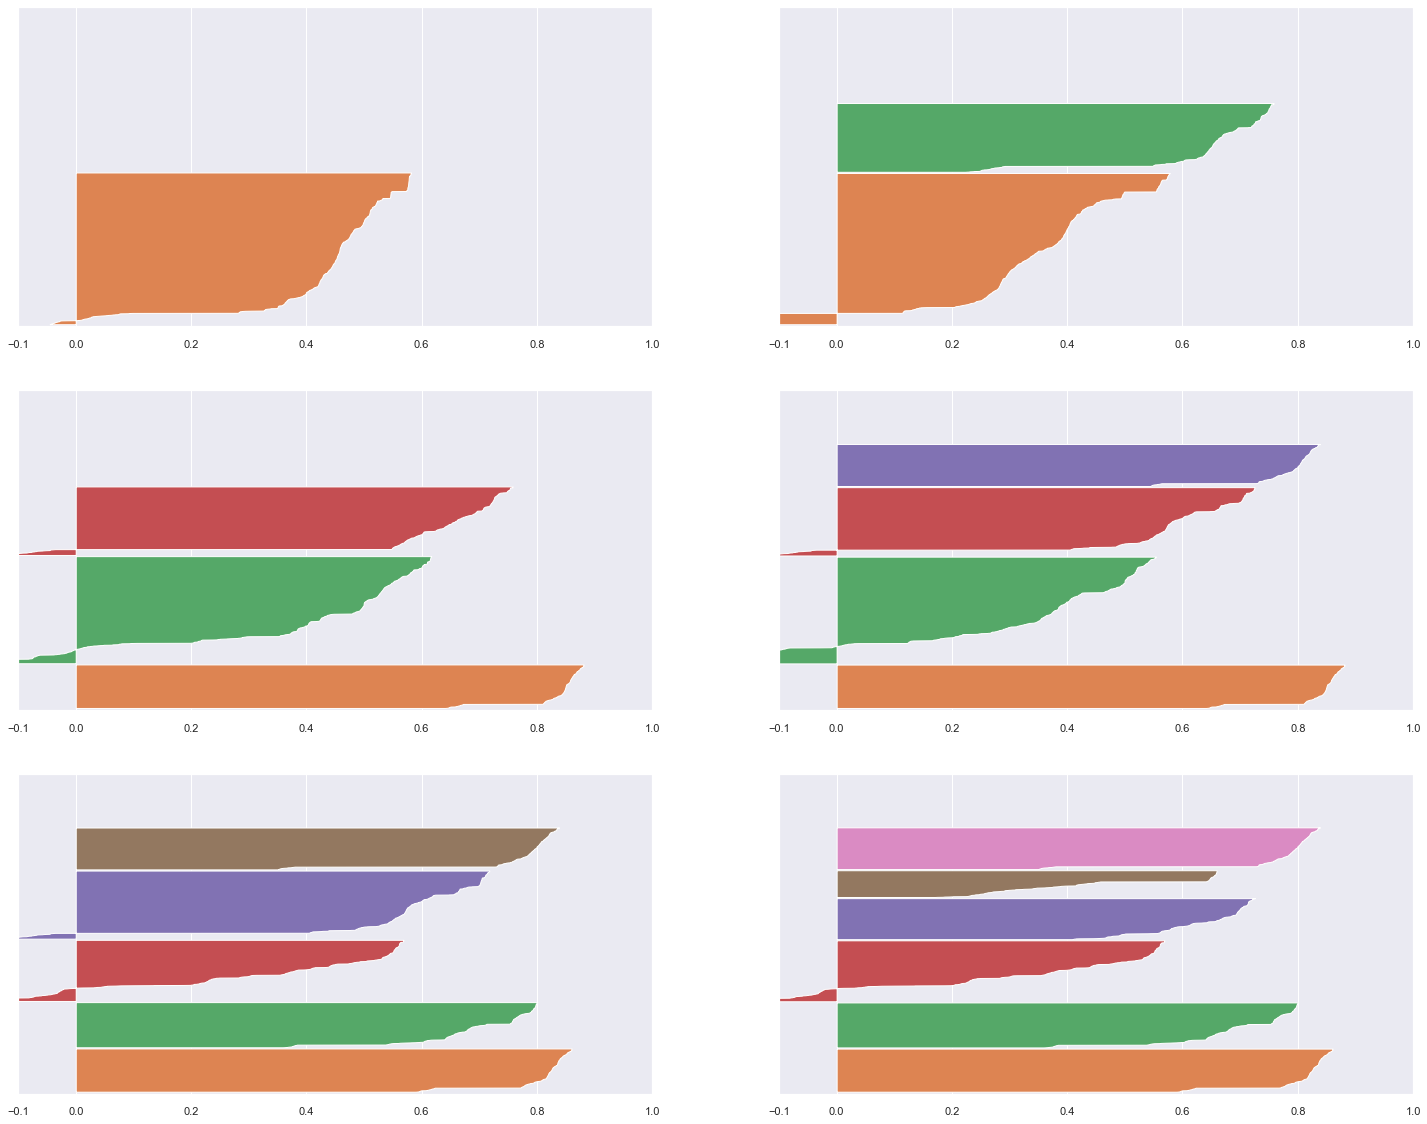

In [94]:
fig, ax = plt.subplots( 3, 2 )
fig.set_size_inches( 25, 20 )

for k in clusters:
    q, mod = divmod( k, 2 )
    
    ax[q-1, mod].set_xlim( [ -0.1, 1] )
    ax[q-1, mod].set_ylim( [ 0, len( X ) + ( k+1 )*10] )
    
    # model definition & training
    hc_model = hc.linkage( X, 'ward' )

    # model predict
    labels = hc.fcluster( hc_model, k, criterion='maxclust' )

    # performance
    ss = m.silhouette_score( X, labels, metric='euclidean' )
    print( ' For K = {}. Silhouette Score: {}'.format( k, ss ) )

    samples_silhouette_values = m.silhouette_samples( X, labels )

    y_lower = 10
    for i in range( k ):

        # select clusters
        ith_samples_silhouette_values = samples_silhouette_values[ labels == i]
        
        # sort values
        ith_samples_silhouette_values.sort()

        # size clusters
        size_cluster_i = ith_samples_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = cm.get_cmap( 'Spectral' )
        color = cmap( i / k )

        ax[q-1, mod].fill_betweenx( np.arange( y_lower, y_upper ), 0, ith_samples_silhouette_values  )
        
        y_lower = y_upper + 10
        
    ax[q-1, mod].set_yticks([])
    ax[q-1, mod].set_xticks( [-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# <font color=red> 8.0. Model Training <font/>

## 8.1.K-Means

In [121]:
# model definition: K-means

k =8
kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300 )

# model training
kmeans.fit( X )

# clustering
labels = kmeans.labels_

## 8.2. GMM

In [ ]:
# model definition: GMM
#k=10
#gmm_model = mx.GaussianMixture( n_components=k )

# model training
#gmm_model.fit( X )

# model predict
#_labels = gmm_model.predict( X )


## 8.2.Cluster Validation

In [122]:
## WSS ( Within-cluster sum of square)
#print( 'WSS value: {}'.format( kmeans.inertia_ ) )

## SS ( Silhouette Score )
print( 'SS value: {}'.format( m.silhouette_score( X, labels, metric='euclidean' ) ) )

SS value: 0.6249247193336487


# <font color=red> 9.0. Cluster Analysis <font/>

In [123]:
df9 = X.copy()
df9['cluster'] = labels

## 9.1.Visualization Inspection

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

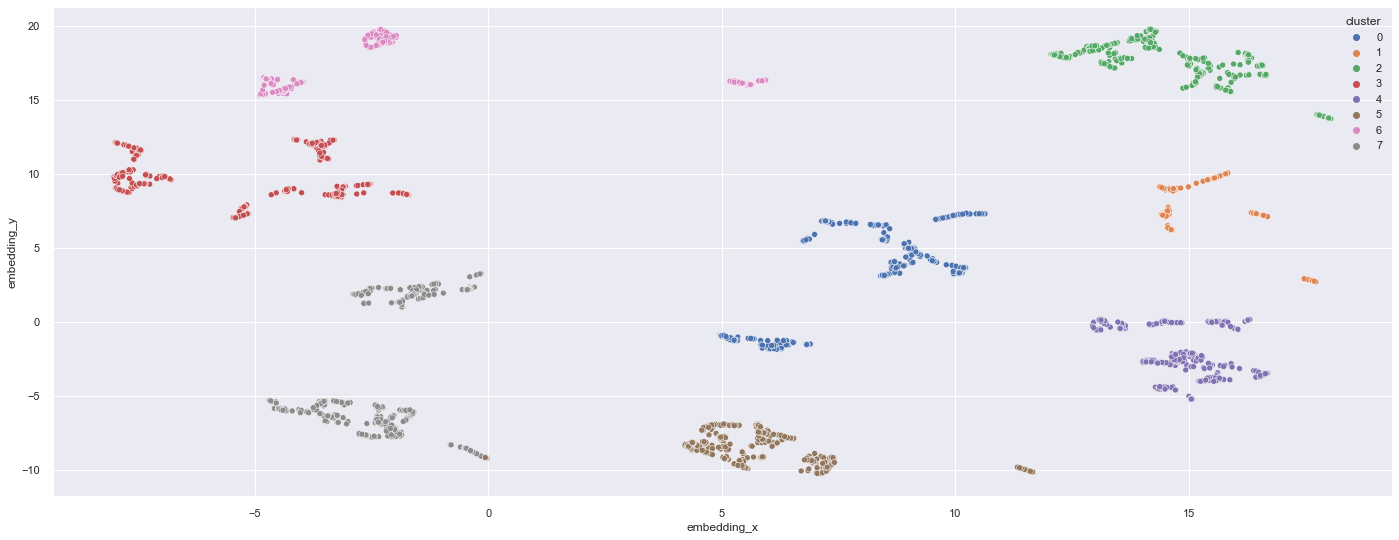

In [97]:
sns.scatterplot(x='embedding_x', y='embedding_y', hue = 'cluster', data = df9, palette = 'deep')

## 9.2. Cluster Profile

In [124]:
df92 = df4[ cols_selected ].copy()
df92['cluster'] = labels
df92.head()

,customer_id,gross_revenue,recency_days,qtde_products,frequency,qtde_returns,cluster
0,17850,5391.21,372.0,297.0,17.000000,40.0,0
1,13047,3232.59,56.0,171.0,0.028302,35.0,5
2,12583,6705.38,2.0,232.0,0.040323,50.0,0
3,13748,948.25,95.0,28.0,0.017921,0.0,4
4,15100,876.00,333.0,3.0,0.073171,22.0,6


In [125]:
# Number of customer
df_cluster = df92[['customer_id', 'cluster']].groupby( 'cluster' ).count().reset_index()
df_cluster['perc_customer'] = 100*( df_cluster['customer_id'] / df_cluster['customer_id'].sum() )

# Avg Gross revenue
df_avg_gross_revenue = df92[['gross_revenue', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_gross_revenue, how='inner', on='cluster' )

# Avg recency days
df_avg_recency_days = df92[['recency_days', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_recency_days, how='inner', on='cluster' )

# Avg invoice_no
df_qtde_products = df92[['qtde_products', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_qtde_products, how='inner', on='cluster' )

# Frequency
df_frequency = df92[['frequency', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_frequency, how='inner', on='cluster' )

# Returns
df_qtde_returns = df92[['qtde_returns', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_qtde_returns, how='inner', on='cluster' )

df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,qtde_products,frequency,qtde_returns
0,0,412,13.881402,9757.393592,20.288835,451.558252,0.104881,169.449029
1,1,256,8.625337,956.454570,43.476562,57.636719,0.024400,0.839844
2,2,322,10.849057,971.025435,75.329193,37.462733,0.074586,6.571429
3,3,506,17.048518,2127.020889,58.875494,66.749012,0.048962,16.891304
4,4,175,5.896226,827.478286,92.022857,26.822857,0.161952,22.868571
5,5,475,16.004043,2713.670547,41.378947,142.303158,0.049603,22.082105
6,6,392,13.207547,505.728827,149.426020,15.522959,0.426596,9.443878
7,7,430,14.487871,1647.382465,53.488372,91.527907,0.047620,10.848837


**Cluster 0 -> Insiders**

Cluster 5 -> More Products

Cluster 3 -> Spend Money

Cluster 7 -> Even More Producs # Precisa comprar produtos mais caros

Cluster 2 -> Less Days 

Cluster 1 -> Less 1k

Cluster 4 -> Stop Return # Aumentar a frequência de compras 

Cluster 6 -> More Buy



In [161]:
with open('df_cluster.pkl', 'wb') as file:
    pickle.dump(df_cluster, file)

In [165]:
with open('df_cluster.pkl', 'rb') as f:
    model_cluster = pickle.load(f)

In [167]:
model_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,qtde_products,frequency,qtde_returns
0,0,412,13.881402,9757.393592,20.288835,451.558252,0.104881,169.449029
1,1,256,8.625337,956.454570,43.476562,57.636719,0.024400,0.839844
2,2,322,10.849057,971.025435,75.329193,37.462733,0.074586,6.571429
3,3,506,17.048518,2127.020889,58.875494,66.749012,0.048962,16.891304
4,4,175,5.896226,827.478286,92.022857,26.822857,0.161952,22.868571
5,5,475,16.004043,2713.670547,41.378947,142.303158,0.049603,22.082105
6,6,392,13.207547,505.728827,149.426020,15.522959,0.426596,9.443878
7,7,430,14.487871,1647.382465,53.488372,91.527907,0.047620,10.848837


# 10.0. Análise Exploratória de Dados

In [126]:
df10 = df92.copy()

In [101]:
df10.head()

,customer_id,gross_revenue,recency_days,qtde_products,frequency,qtde_returns,cluster
0,17850,5391.21,372.0,297.0,17.000000,40.0,2
1,13047,3232.59,56.0,171.0,0.028302,35.0,1
2,12583,6705.38,2.0,232.0,0.040323,50.0,2
3,13748,948.25,95.0,28.0,0.017921,0.0,7
4,15100,876.00,333.0,3.0,0.073171,22.0,3


## 10.1. MindMap de hipoteses

1. Fenômeno 
2. Entidades ( Customer, Location, Finance, Family)
3. Caracteristicas da Entidade ( Customer=Nome, Idade, salário, escolaridade )

## 10.2. Hipótese de Negócios

1. Afirmação
2. Comparação entre variáveis
3. Valor base de comparação

In [ ]:
#Cluster | Variável para testar | Base de comparação

### Hipóteses Compra

1. Os clientes do cluster insiders usam cartão de crédito em 80% das compras.
2. Os clientes do cluster insiders possuem um ticket médio de 10% acima do cluster More Products
3. Os clientes do cluster insiders possuem um basket size acima de 5 produtos
4. **Os clientes do cluster insiders possuem um volume (produtos) de compras acima de 10% do total de compras**
5. **Os clientes do cluster insiders possuem um volume (faturamento) de compras acima de 10% do total de compras**
6. **Os clientes do cluster insiders tem um número de devolução abaixo da média da base total de clientes**
7. **A mediana do faturamento pelos clientes do cluster insider é 10% maior do que a mediana do faturamento geral.**
8. **O percentil do gmv pelos clientes insiders.**


### H1. **Os clientes do cluster insiders possuem um volume (produtos) de compras acima de 10% do total de compras**

**Verdade:** O cluster insider possui um volume de compra de produtos de 51%

In [127]:
# soma da qtde de produtos do insiders
df_sales_insiders = df10.loc[df10['cluster'] == 0, 'qtde_products'].sum()
df_sales_total = df10.loc[:, 'qtde_products'].sum()

# soma da qtde de produtos total
print( '% Sales Insiders: {:.2f}%'.format( 100*df_sales_insiders / df_sales_total ) )

% Sales Insiders: 51.06%


### H2. Os clientes do cluster insiders possuem um volume (faturamento) de compras acima de 10% do total de compras

**Verdadeiro:** O cluster insider possuem um volume de GMV de 50%

In [128]:
# soma da qtde de produtos do insiders
df_gmv_insiders = df10.loc[df10['cluster'] == 0, 'gross_revenue'].sum()
df_gmv_total = df10.loc[:, 'gross_revenue'].sum()

# soma da qtde de produtos total
print( '% GMV Insiders: {:.2f}%'.format( 100*df_gmv_insiders / df_gmv_total ) )

% GMV Insiders: 50.29%


### H3. Os clientes do cluster insiders tem um número de devolução médio abaixo da média da base total de clientes

**Falso:** O cluster insiders tem a média de devoluções acima da média geral

In [134]:
df_avg_return_insiders = df10.loc[df10['cluster'] == 0, 'qtde_returns'].mean()

# media de devolucao do total
df_avg_return_all = df10['qtde_returns'].mean()

#
print( 'Avg Return Insiders: {} vs Avg Return All:{}'.format( np.round( df_avg_return_insiders, 0 ), 
                                                              np.round( df_avg_return_all, 0 ) ) )

Avg Return Insiders: 169.0 vs Avg Return All:35.0


### H4. A mediana do faturamento pelos clientes do cluster insider é 10% maior do que a  mediana do faturamento geral.

**Verdadeiro.** A mediana do faturamento é 317% acima da média.

In [137]:
# mediana de gmv do insiders
df_median_gmv_insiders = df10.loc[df10['cluster'] == 0, 'gross_revenue'].median()

# mediana de gmv do total
df_median_gmv_total = df10.loc[:, 'gross_revenue'].median()

gmv_diff = ( df_median_gmv_insiders - df_median_gmv_total ) / df_median_gmv_total
print( 'Median Diff: {:.2f}%'.format( 100*gmv_diff ) )

Median Diff: 317.86%


### H5. A GMV dos clientes insiders esta concentrados no 3 quartil

**Falso.** O faturamento do cluster insiders está concentrada no primeiro quartil

In [142]:
np.percentile( df10.loc[df10['cluster'] == 0, 'gross_revenue'], q=0.1 )

699.3465599999997

In [144]:
np.percentile( df10.loc[df10['cluster'] == 0, 'gross_revenue'], q=0.9 )

947.3065300000001

<AxesSubplot:xlabel='gross_revenue'>

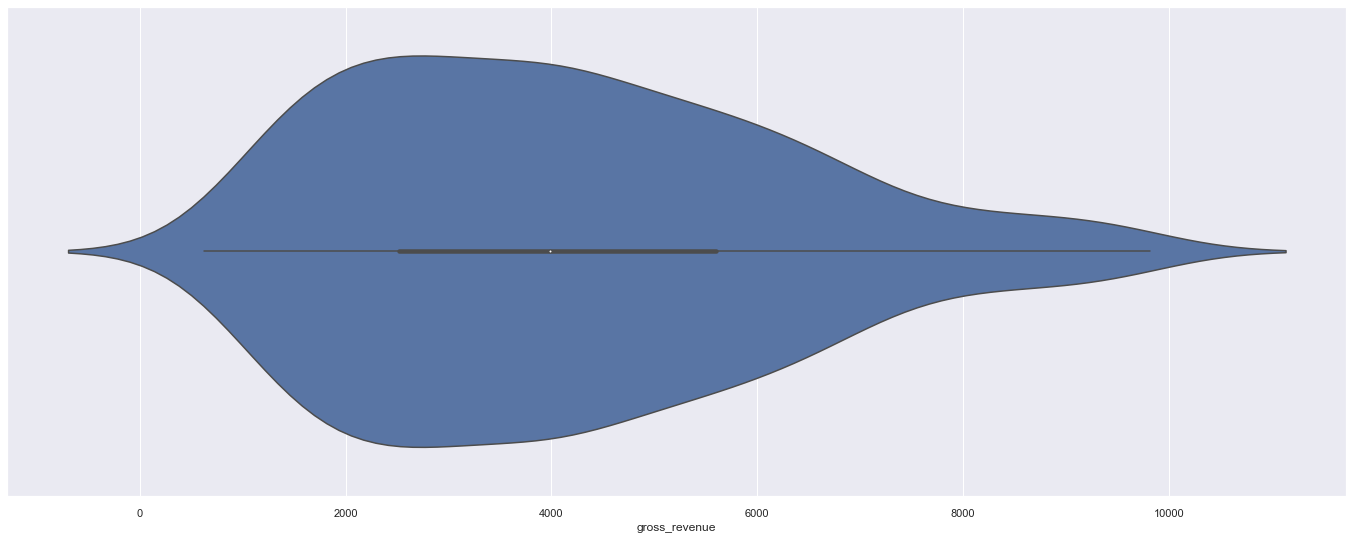

In [147]:
df_aux = df10.loc[(df10['cluster'] == 0) & (df10['gross_revenue'] < 10000 ), 'gross_revenue'];
sns.violinplot( x=df_aux )

In [148]:
df10.to_csv('df10.csv')

### Perguntas de Negócio

#### 1. Quem são as pessoas elegíveis para participar do programa de Insiders ?

In [149]:
df10.loc[df10['cluster'] == 0, 'customer_id'].head()

0     17850
2     12583
6     14688
8     15311
12    16029
Name: customer_id, dtype: int64

#### 2. Quantos clientes farão parte do grupo?


In [150]:
df10.loc[df10['cluster'] == 0, 'customer_id'].size

412

#### 3. Quais as principais características desses clientes ?

Cluster Insider

- Número de clientes: 412 (14% do customers )
- Faturamento médio: $9757,00 dólares
- Recência média: 20 dias
- Média de Produtos comprados: 451 produtos
- Frequência de Produtos comprados: 0.10 produtos/dia
- Receita em média: $9757,00 dólares 